In [ ]:
#install huggingface
!pip install autotrain-advanced
!pip install huggingface_hub

In [ ]:
# update torch on google collab
!autotrain setup --update-torch

> INFO    Installing latest xformers
> INFO    Successfully installed latest xformers
> INFO    Installing latest PyTorch
> INFO    Successfully installed latest PyTorch


In [ ]:
#log in to hugging face
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
#load models - qa bot
from transformers import AutoModelForCausalLM, AutoTokenizer
model_qa_bot = AutoModelForCausalLM.from_pretrained("ApurvaKolhe/newsQA")
model_qa_bot.eval()

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

adapter_config.json:   0%|          | 0.00/458 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

pytorch_model-00001-of-00010.bin:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

pytorch_model-00002-of-00010.bin:   0%|          | 0.00/2.88G [00:00<?, ?B/s]

pytorch_model-00003-of-00010.bin:   0%|          | 0.00/2.99G [00:00<?, ?B/s]

pytorch_model-00004-of-00010.bin:   0%|          | 0.00/2.86G [00:00<?, ?B/s]

pytorch_model-00005-of-00010.bin:   0%|          | 0.00/2.88G [00:00<?, ?B/s]

pytorch_model-00006-of-00010.bin:   0%|          | 0.00/2.97G [00:00<?, ?B/s]

pytorch_model-00007-of-00010.bin:   0%|          | 0.00/2.88G [00:00<?, ?B/s]

pytorch_model-00008-of-00010.bin:   0%|          | 0.00/2.99G [00:00<?, ?B/s]

pytorch_model-00009-of-00010.bin:   0%|          | 0.00/2.86G [00:00<?, ?B/s]

pytorch_model-00010-of-00010.bin:   0%|          | 0.00/705M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/10 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/174 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(


adapter_model.bin:   0%|          | 0.00/33.6M [00:00<?, ?B/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 4096, padding_idx=0)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(
            in_features=4096, out_features=4096, bias=False
            (lora_dropout): ModuleDict(
              (default): Dropout(p=0.05, inplace=False)
            )
            (lora_A): ModuleDict(
              (default): Linear(in_features=4096, out_features=16, bias=False)
            )
            (lora_B): ModuleDict(
              (default): Linear(in_features=16, out_features=4096, bias=False)
            )
            (lora_embedding_A): ParameterDict()
            (lora_embedding_B): ParameterDict()
          )
          (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear(
            in_features=4096, out_features=4096, bias=False
            (lora_dropout): ModuleDict(
              (default): Dropout(p=0

In [ ]:
#toenizer - QA
tokenizer_qa_bot = AutoTokenizer.from_pretrained("ApurvaKolhe/newsQA")

tokenizer_config.json:   0%|          | 0.00/983 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

In [ ]:
#getting statistics of the model

In [ ]:
num_parameters = sum(p.numel() for p in model_qa_bot.parameters())
print(f"Number of model parameters: {num_parameters}")


Number of model parameters: 6746804224


In [ ]:
# Embedding Layer
vocab_size = model_qa_bot.model.embed_tokens.num_embeddings
print(f"Vocabulary size: {vocab_size}")

embedding_dim = model_qa_bot.model.embed_tokens.embedding_dim
print(f"Embedding dimension: {embedding_dim}")


Vocabulary size: 32000
Embedding dimension: 4096


In [ ]:
# Transformer Layers
num_layers = len(model_qa_bot.model.layers)
print(f"Number of transformer layers: {num_layers}")


Number of transformer layers: 32


In [ ]:
# Decoder Attention
num_attention_heads = model_qa_bot.model.layers[0].self_attn.q_proj.out_features // 64
print(f"Number of attention heads: {num_attention_heads}")

attention_head_size = model_qa_bot.model.layers[0].self_attn.q_proj.out_features // num_attention_heads
print(f"Attention head size: {attention_head_size}")

Number of attention heads: 64
Attention head size: 64


In [ ]:
# Sequence Lengths
max_input_length = model_qa_bot.config.max_position_embeddings
print(f"Maximum input sequence length: {max_input_length}")

max_output_length = model_qa_bot.config.max_length
print(f"Maximum output sequence length: {max_output_length}")

Maximum input sequence length: 2048
Maximum output sequence length: 20


In [ ]:
#Normalization & activation function
norm_type = model_qa_bot.model.norm._get_name()
print(f"Normalization type: {norm_type}")

act_fn = model_qa_bot.model.layers[0].mlp.act_fn._get_name()
print(f"Activation function: {act_fn}")

Normalization type: LlamaRMSNorm
Activation function: SiLUActivation


In [ ]:
#evaluating on test data

In [ ]:
#setting for QA model
generation_config = model_qa_bot.generation_config
generation_config.max_new_tokens = 50
generation_config.temperature = 0.5
generation_config.top_p = 0.5
generation_config.num_return_sequences = 1
generation_config.do_sample=True

In [ ]:
def get_answer_from_generated_text(text):
    parts = text.split('[INST]')
    question_answer = None
    for part in parts:
        if 'QUESTION :' in part:
            question_answer = part.strip()
            break

    if question_answer:
        question_text, answer = question_answer.split(']')[0], question_answer.split(']')[1]
        question_text = question_text.replace('QUESTION :', '').replace('[/INST', '').strip()
        answer = answer.strip()
        return "Answer:", answer
    else:
        return "Couldn't fetch an article, please try again."

def generate_answer(prompt):
    input_ids = tokenizer_qa_bot.encode(prompt, return_tensors='pt')
    output = model_qa_bot.generate(input_ids)
    generated_text = tokenizer_qa_bot.decode(output[0])
    answer = get_answer_from_generated_text(generated_text)
    return answer

In [ ]:
import pandas as pd
from tqdm import tqdm
csv_file = 'test_101_rows_trimmed.csv'
df = pd.read_csv(csv_file)

with tqdm(total=len(df), desc="Processing rows", unit="row") as pbar:
    for index, row in df.iterrows():
        prompt = row['prompt']

        # Generate answer
        answer_tuple = generate_answer(prompt)
        if len(answer_tuple) == 2 and answer_tuple[0] == "Answer:":
            answer = answer_tuple[1]
            df.at[index, 'llama_answer'] = answer
        else:
            df.at[index, 'llama_answer'] = "Error in generating answer"
        df.to_csv(csv_file, index=False)

        pbar.update(1)

print("Processing complete.")

Processing rows: 100%|██████████| 100/100 [56:50<00:00, 34.10s/row]

Processing complete.


In [ ]:
#evaluating the model performance
#using bleu score
!pip install matplotlib
!pip install pandas nltk
import nltk
nltk.download('punkt')

In [ ]:
import pandas as pd
from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import SmoothingFunction

Mean BLEU Score: 0.12865577992247731
Median BLEU Score: 0.08034284189446518
Standard Deviation of BLEU Scores: 0.16742588993413682


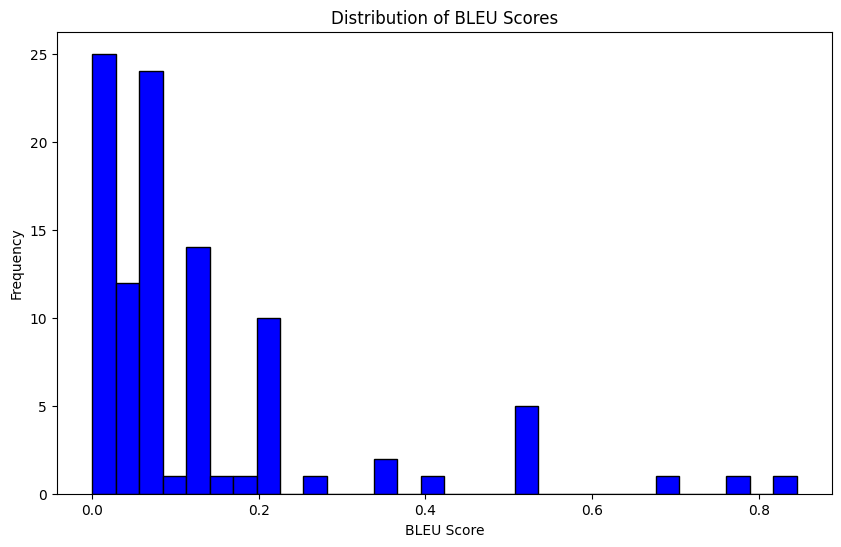

In [ ]:
df = pd.read_csv('test_101_rows_trimmed.csv')

# Function to calculate BLEU score
def calculate_bleu(reference, candidate):
    reference_tokens = word_tokenize(reference.lower())
    candidate_tokens = word_tokenize(candidate.lower())
    smoother = SmoothingFunction().method1  # Using smoothing method 1
    return sentence_bleu([reference_tokens], candidate_tokens, smoothing_function=smoother)


# Apply the function to each row
df['bleu_score'] = df.apply(lambda row: calculate_bleu(row['answer'], row['llama_answer']), axis=1)

# Calculate Descriptive Statistics
mean_bleu = df['bleu_score'].mean()
median_bleu = df['bleu_score'].median()
std_bleu = df['bleu_score'].std()

# Display the statistics
print(f"Mean BLEU Score: {mean_bleu}")
print(f"Median BLEU Score: {median_bleu}")
print(f"Standard Deviation of BLEU Scores: {std_bleu}")

# Plotting the distribution of BLEU scores
plt.figure(figsize=(10, 6))
plt.hist(df['bleu_score'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of BLEU Scores')
plt.xlabel('BLEU Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# using rouge
!pip install rouge

ROUGE-1 Scores:
Mean: 0.4949077755768911, Median: 0.6333333284333333, Standard Deviation: 0.31121895013559137

ROUGE-2 Scores:
Mean: 0.2618354773236957, Median: 0.0, Standard Deviation: 0.336869315892793

ROUGE-L Scores:
Mean: 0.4894532301223456, Median: 0.5857142808653062, Standard Deviation: 0.3086815965789544



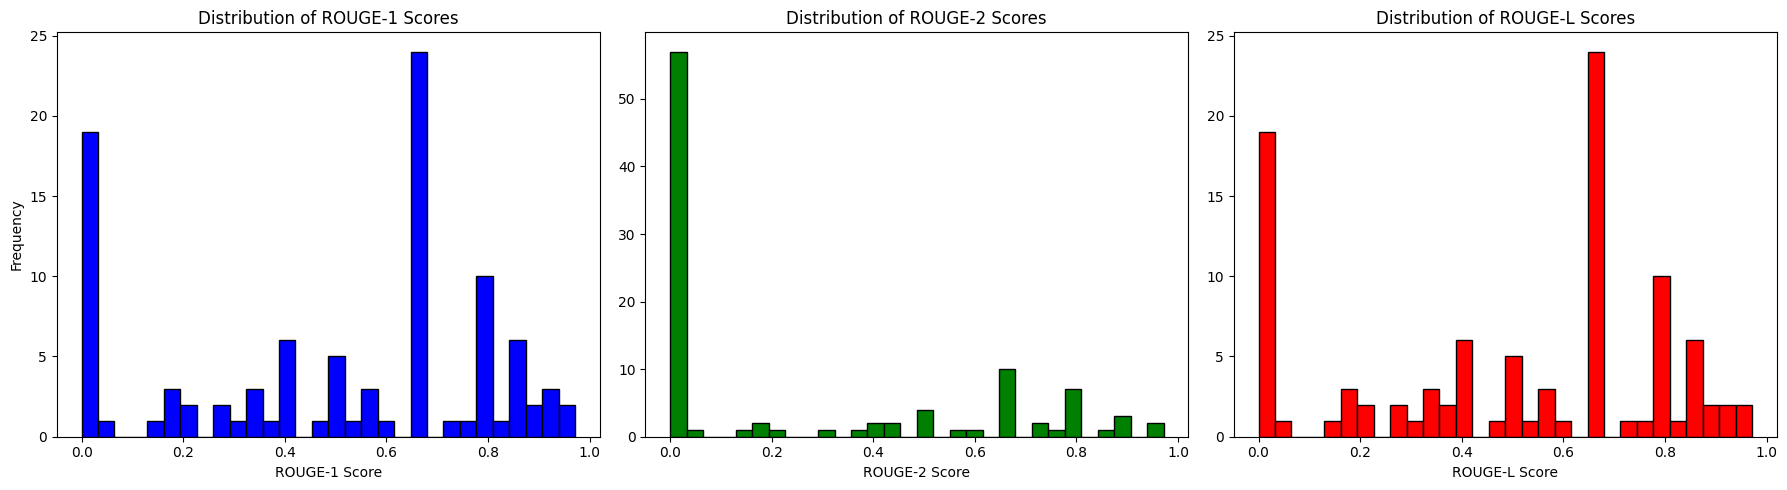

In [ ]:
import pandas as pd
from rouge import Rouge
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('test_101_rows_trimmed.csv')

# Initialize Rouge
rouge = Rouge()

# Function to calculate ROUGE scores
def calculate_rouge_scores(reference, candidate):
    try:
        scores = rouge.get_scores(candidate, reference)
        return scores[0]
    except ValueError:
        # Handle cases where text is empty
        return {'rouge-1': {'f': 0.0, 'p': 0.0, 'r': 0.0},
                'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
                'rouge-l': {'f': 0.0, 'p': 0.0, 'r': 0.0}}

# Apply the function to each row
df['rouge_scores'] = df.apply(lambda row: calculate_rouge_scores(row['answer'], row['llama_answer']), axis=1)

# Extracting individual scores
df['rouge-1'] = df['rouge_scores'].apply(lambda x: x['rouge-1']['f'])
df['rouge-2'] = df['rouge_scores'].apply(lambda x: x['rouge-2']['f'])
df['rouge-l'] = df['rouge_scores'].apply(lambda x: x['rouge-l']['f'])

# Calculate Statistics for Each ROUGE Score
mean_rouge1 = np.mean(df['rouge-1'])
median_rouge1 = np.median(df['rouge-1'])
std_rouge1 = np.std(df['rouge-1'])

mean_rouge2 = np.mean(df['rouge-2'])
median_rouge2 = np.median(df['rouge-2'])
std_rouge2 = np.std(df['rouge-2'])

mean_rougel = np.mean(df['rouge-l'])
median_rougel = np.median(df['rouge-l'])
std_rougel = np.std(df['rouge-l'])

# Display the statistics
print("ROUGE-1 Scores:")
print(f"Mean: {mean_rouge1}, Median: {median_rouge1}, Standard Deviation: {std_rouge1}\n")

print("ROUGE-2 Scores:")
print(f"Mean: {mean_rouge2}, Median: {median_rouge2}, Standard Deviation: {std_rouge2}\n")

print("ROUGE-L Scores:")
print(f"Mean: {mean_rougel}, Median: {median_rougel}, Standard Deviation: {std_rougel}\n")

# Plotting the distribution of each ROUGE score
plt.figure(figsize=(18, 5))

# ROUGE-1
plt.subplot(1, 3, 1)
plt.hist(df['rouge-1'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of ROUGE-1 Scores')
plt.xlabel('ROUGE-1 Score')
plt.ylabel('Frequency')

# ROUGE-2
plt.subplot(1, 3, 2)
plt.hist(df['rouge-2'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of ROUGE-2 Scores')
plt.xlabel('ROUGE-2 Score')

# ROUGE-L
plt.subplot(1, 3, 3)
plt.hist(df['rouge-l'], bins=30, color='red', edgecolor='black')
plt.title('Distribution of ROUGE-L Scores')
plt.xlabel('ROUGE-L Score')

plt.tight_layout()
plt.show()

In [ ]:
#finding out semantic similarity
!pip install transformers scipy

Mean Cosine Similarity: 0.5981484252214432
Median Cosine Similarity: 0.5498666167259216
Standard Deviation: 0.14432322622657162


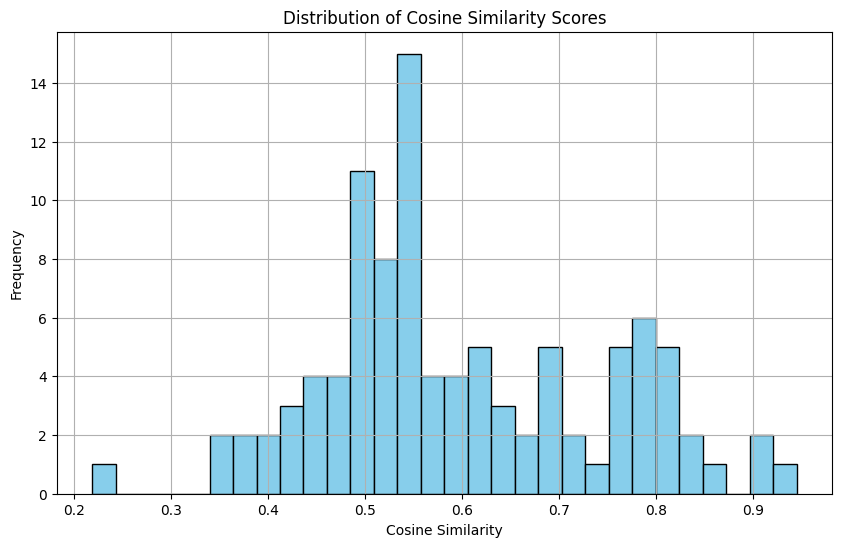

In [ ]:
from transformers import BertModel, BertTokenizer
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import pandas as pd
import torch

# Load pre-trained model and tokenizer
model = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to compute BERT embeddings
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True)
    outputs = model(**inputs)
    # To ensure the output is a 1-D tensor
    return outputs.last_hidden_state.mean(dim=1).squeeze()

# Function to calculate cosine similarity
def calculate_cosine_similarity(text1, text2):
    embedding1 = get_bert_embedding(text1)
    embedding2 = get_bert_embedding(text2)
    # Convert tensors to numpy arrays to ensure they are 1-D
    return 1 - cosine(embedding1.detach().numpy(), embedding2.detach().numpy())

# Read the CSV file
df = pd.read_csv('test_101_rows_trimmed.csv')

# Apply the function to each row
df['cosine_similarity'] = df.apply(lambda row: calculate_cosine_similarity(row['answer'], row['llama_answer']), axis=1)

# Calculate Statistics
mean_similarity = df['cosine_similarity'].mean()
median_similarity = df['cosine_similarity'].median()
std_similarity = df['cosine_similarity'].std()

# Display the statistics
print(f"Mean Cosine Similarity: {mean_similarity}")
print(f"Median Cosine Similarity: {median_similarity}")
print(f"Standard Deviation: {std_similarity}")

# Plotting the distribution of cosine similarity scores
plt.figure(figsize=(10, 6))
plt.hist(df['cosine_similarity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()